In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load and Inspect the data set

In [2]:
data = pd.read_csv('/content/bike.csv')

In [3]:
data

,Date,Rented Bike Count,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     8760 non-null   object 
 1   Rented Bike Count        8760 non-null   int64  
 2   Hour                     8760 non-null   int64  
 3   Temperature(?C)          8760 non-null   float64
 4   Humidity(%)              8760 non-null   int64  
 5   Wind speed (m/s)         8760 non-null   float64
 6   Visibility (10m)         8760 non-null   int64  
 7   Dew point temperature    8760 non-null   float64
 8   Solar Radiation (MJ/m2)  8760 non-null   float64
 9   Rainfall(mm)             8760 non-null   float64
 10  Snowfall (cm)            8760 non-null   float64
 11  Seasons                  8760 non-null   object 
 12  Holiday                  8760 non-null   object 
 13  Functioning Day          8760 non-null   object 
dtypes: float64(6), int64(4),

# checking the Null Values

In [5]:
data.isnull().sum()


,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(?C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature,0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


# Checking the duplicates

In [6]:
print(data.duplicated().sum())



0


# Correcting the data types

In [7]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Year'] = data['Date'].dt.year.astype('category')
data['Month'] = data['Date'].dt.month.astype('category')
data['Day'] = data['Date'].dt.day.astype('category')


In [8]:

data['Seasons'] = data['Seasons'].astype('category')
data['Holiday'] = data['Holiday'].astype('category')
data['Functioning Day'] = data['Functioning Day'].astype('category')


In [9]:
data.drop('Date',axis=1,inplace=True)

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   int64   
 2   Temperature(?C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Dew point temperature    8760 non-null   float64 
 7   Solar Radiation (MJ/m2)  8760 non-null   float64 
 8   Rainfall(mm)             8760 non-null   float64 
 9   Snowfall (cm)            8760 non-null   float64 
 10  Seasons                  8760 non-null   category
 11  Holiday                  8760 non-null   category
 12  Functioning Day          8760 non-null   category
 13  Year                     8760 non-null   category
 14  Month   

In [11]:
data.head()


,Rented Bike Count,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1


# Visualization of the data set

In [12]:
data.describe()



,Rented Bike Count,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


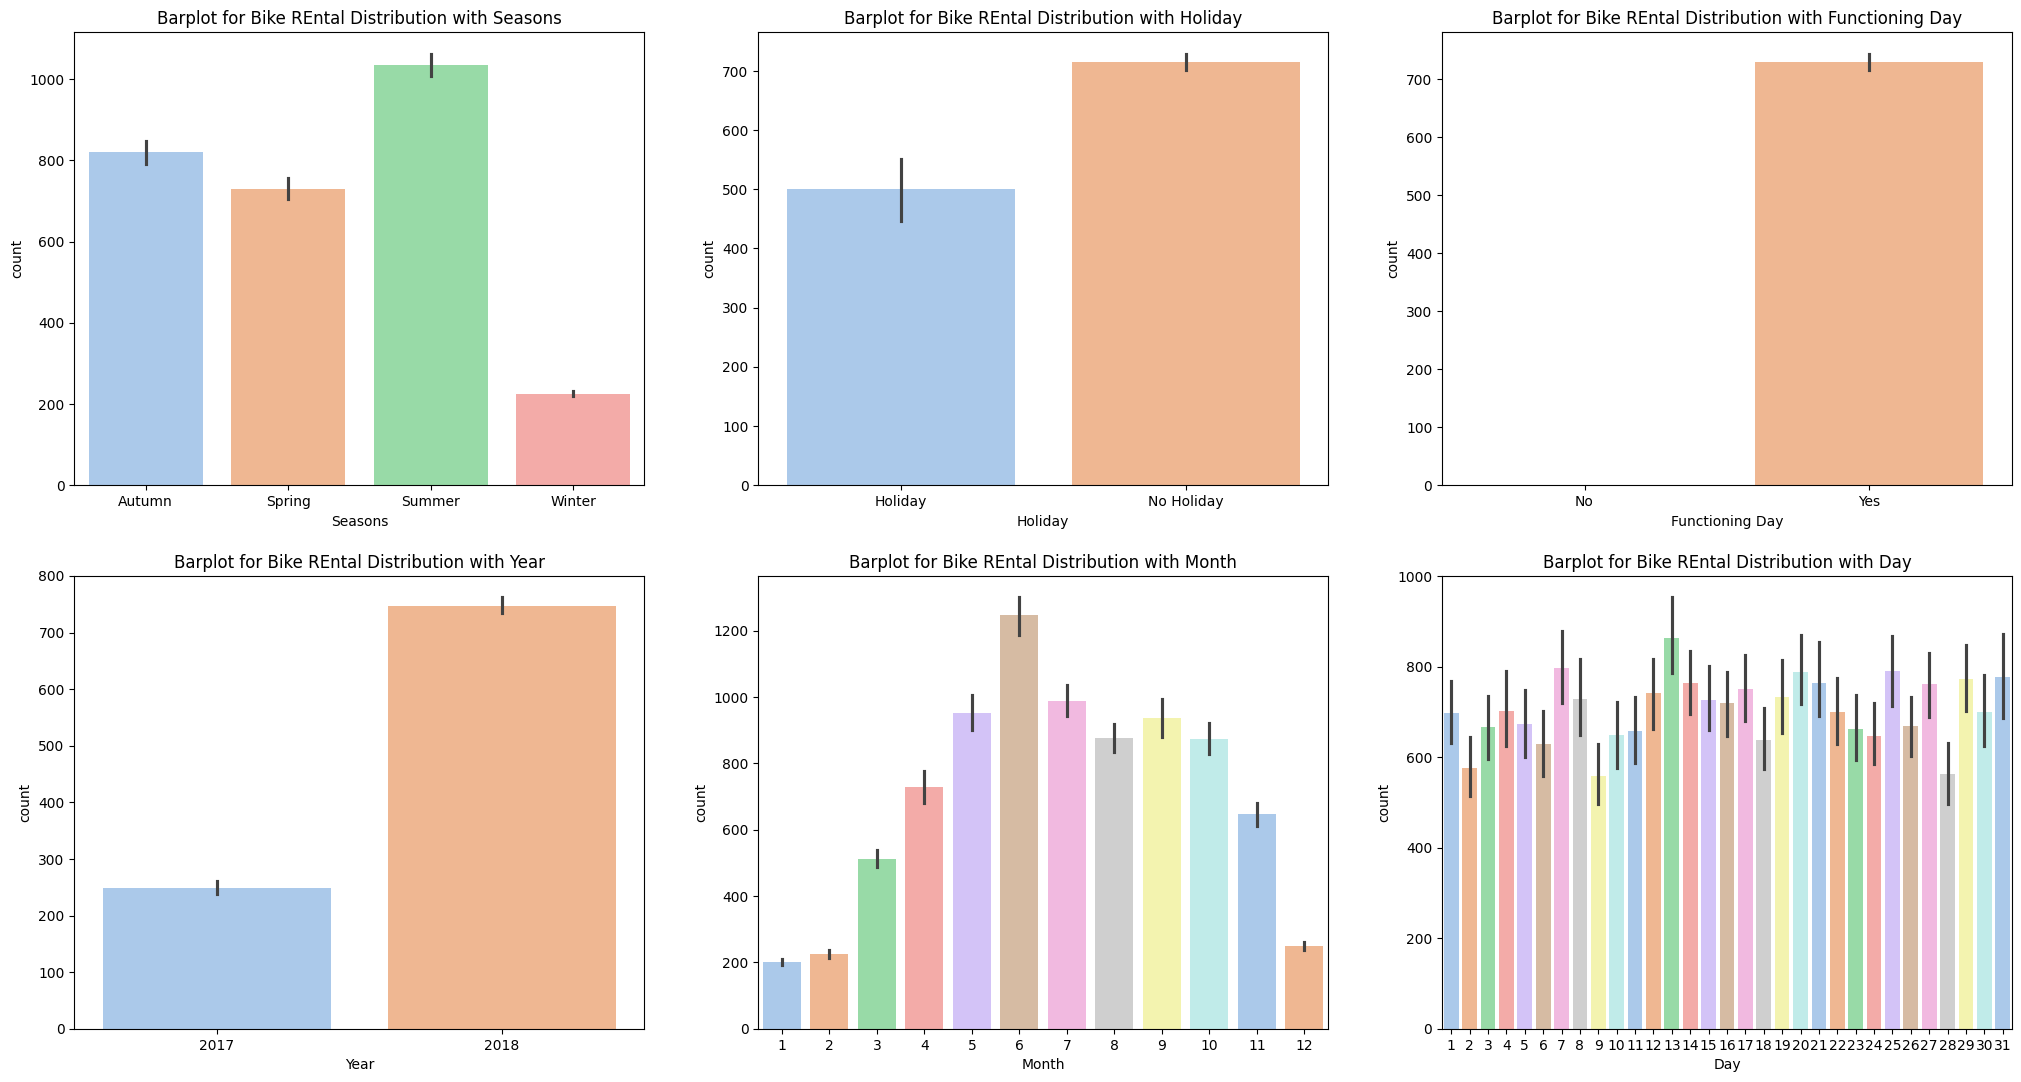

In [13]:
plt.figure(figsize=(25,20))
for i,col in enumerate(data.select_dtypes(include ='category').columns):
  plt.subplot(3,3,i+1)
  sns.barplot(x=col,y='Rented Bike Count',data=data,palette="pastel")
  plt.xlabel(col)
  plt.ylabel('count')
  plt.title(f'Barplot for Bike REntal Distribution with {col}')


# count of observations in each category.

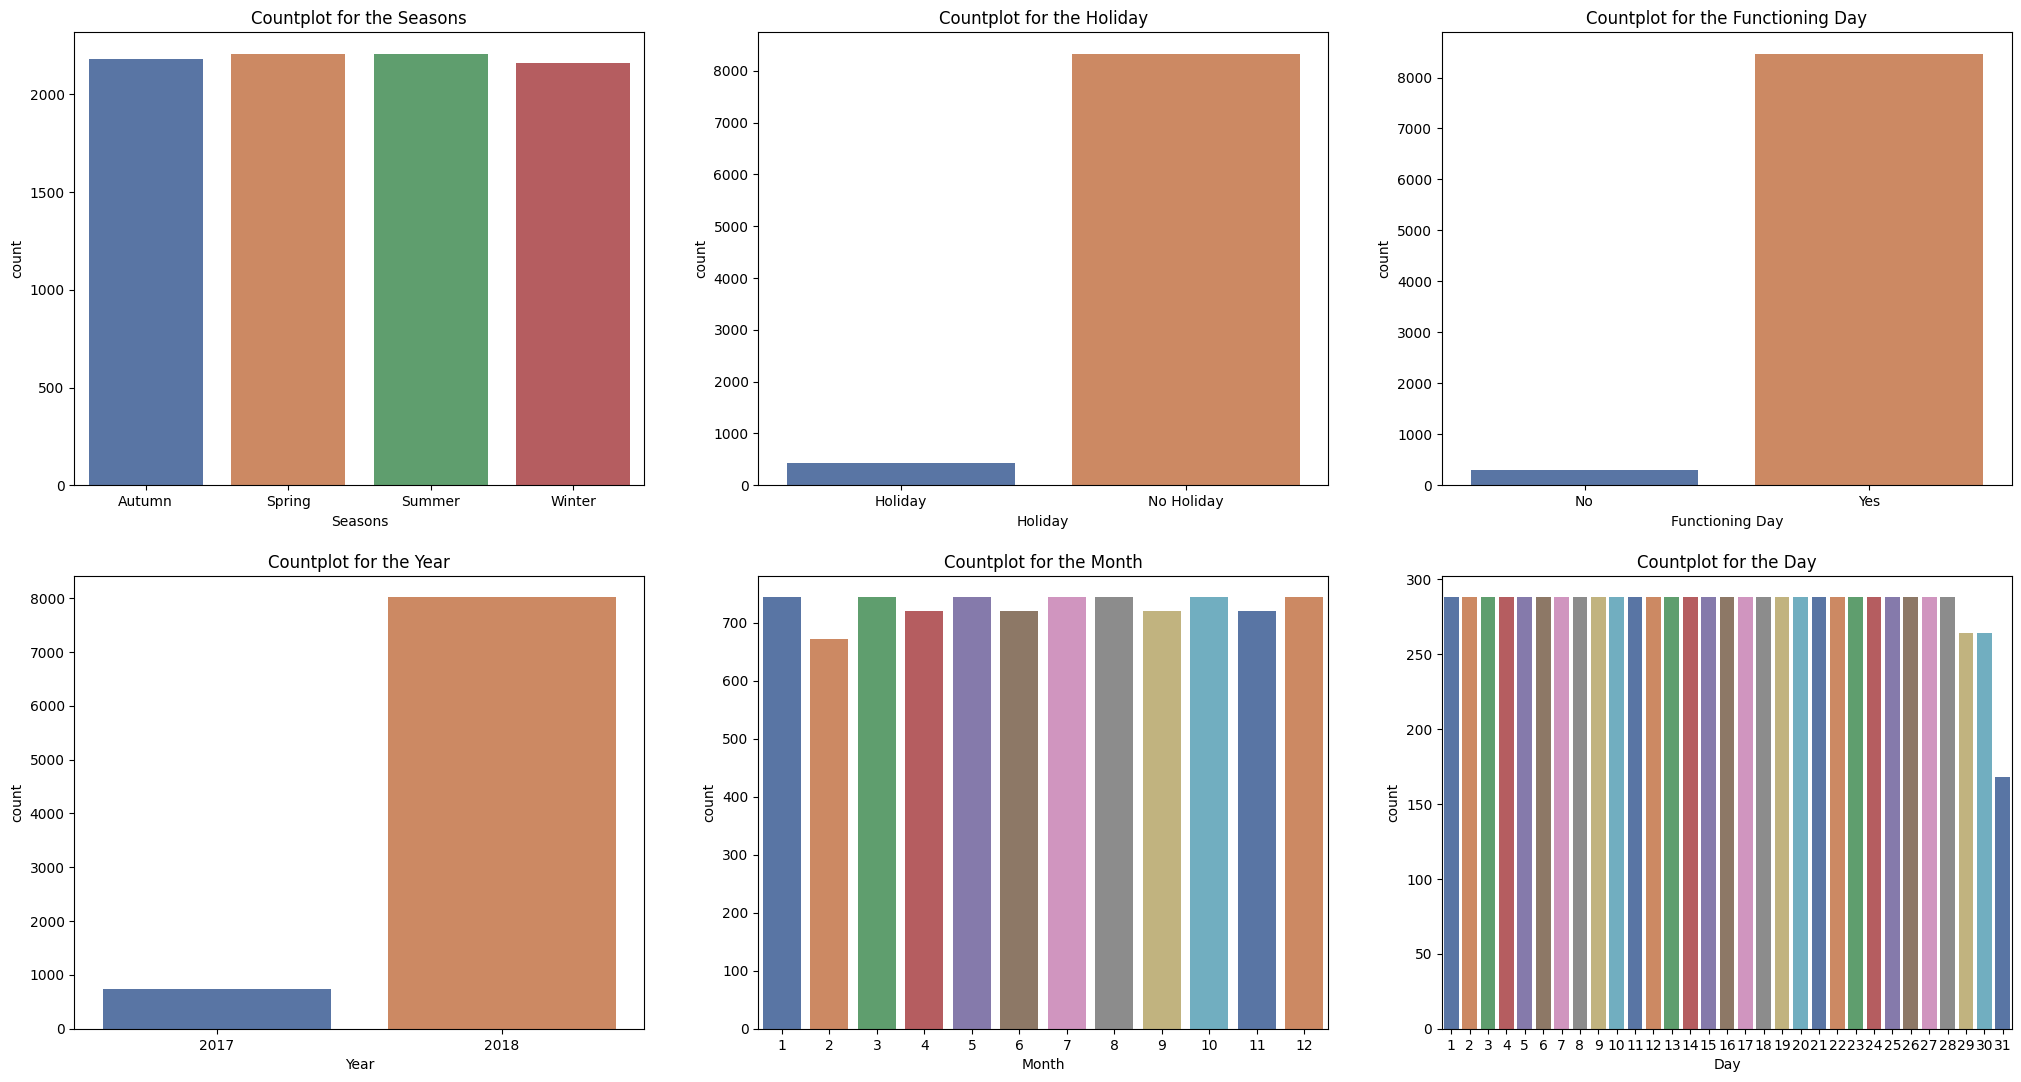

In [14]:
plt.figure(figsize=(25,20))
for i,col in enumerate(data.select_dtypes(include ='category').columns):
  plt.subplot(3,3,i+1)
  sns.countplot(x=col,data=data,palette="deep")
  plt.xlabel(col)
  plt.ylabel('count')
  plt.title(f'Countplot for the {col}')


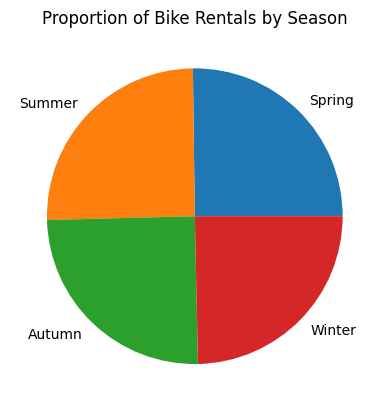

In [15]:
data['Seasons'].value_counts().plot(kind='pie')
plt.title('Proportion of Bike Rentals by Season')
plt.ylabel('')
plt.show()


# Proportion of Bike Rentals

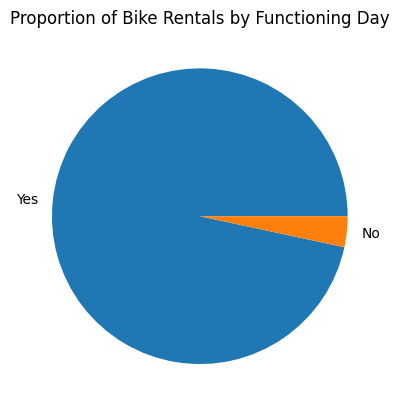

In [16]:
data['Functioning Day'].value_counts().plot(kind='pie')
plt.title('Proportion of Bike Rentals by Functioning Day')
plt.ylabel('')
plt.show()


# Checking the trends

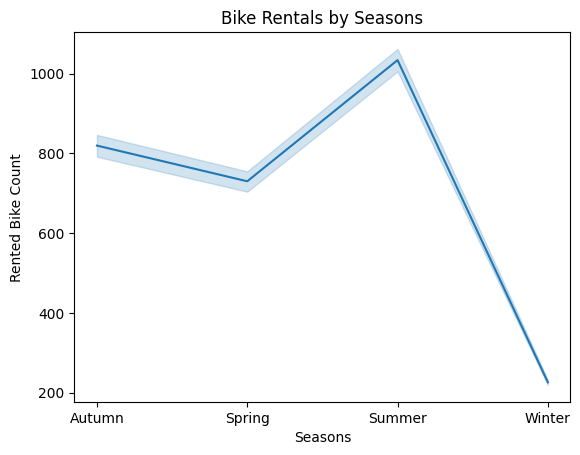

In [17]:

sns.lineplot(x='Seasons', y='Rented Bike Count', data=data)
plt.title('Bike Rentals by Seasons')
plt.show()


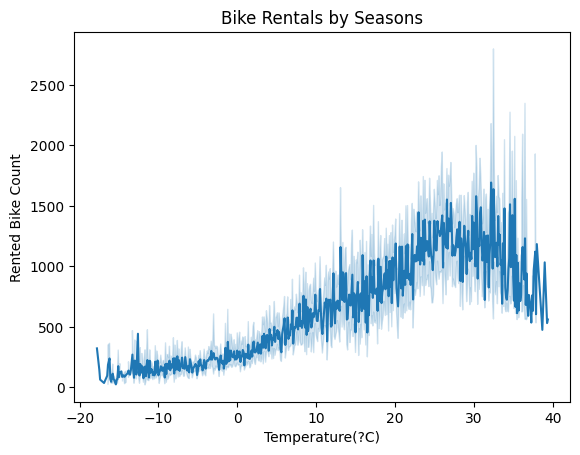

In [18]:
sns.lineplot(x='Temperature(?C)', y='Rented Bike Count', data=data)
plt.title('Bike Rentals by Seasons')
plt.show()

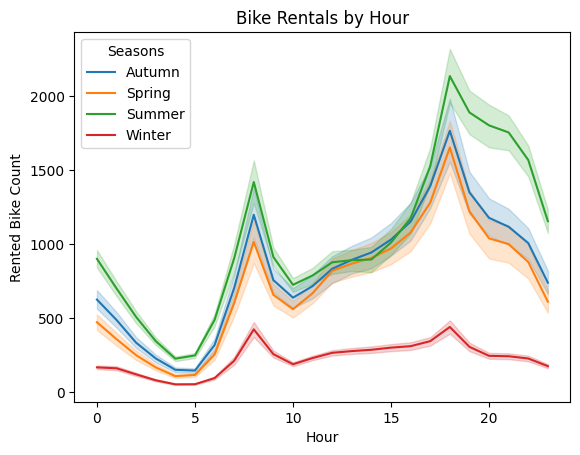

In [19]:
sns.lineplot(x='Hour', y='Rented Bike Count', data=data ,hue='Seasons')
plt.title('Bike Rentals by Hour')
plt.show()


# Checking Distribution and outliers in data


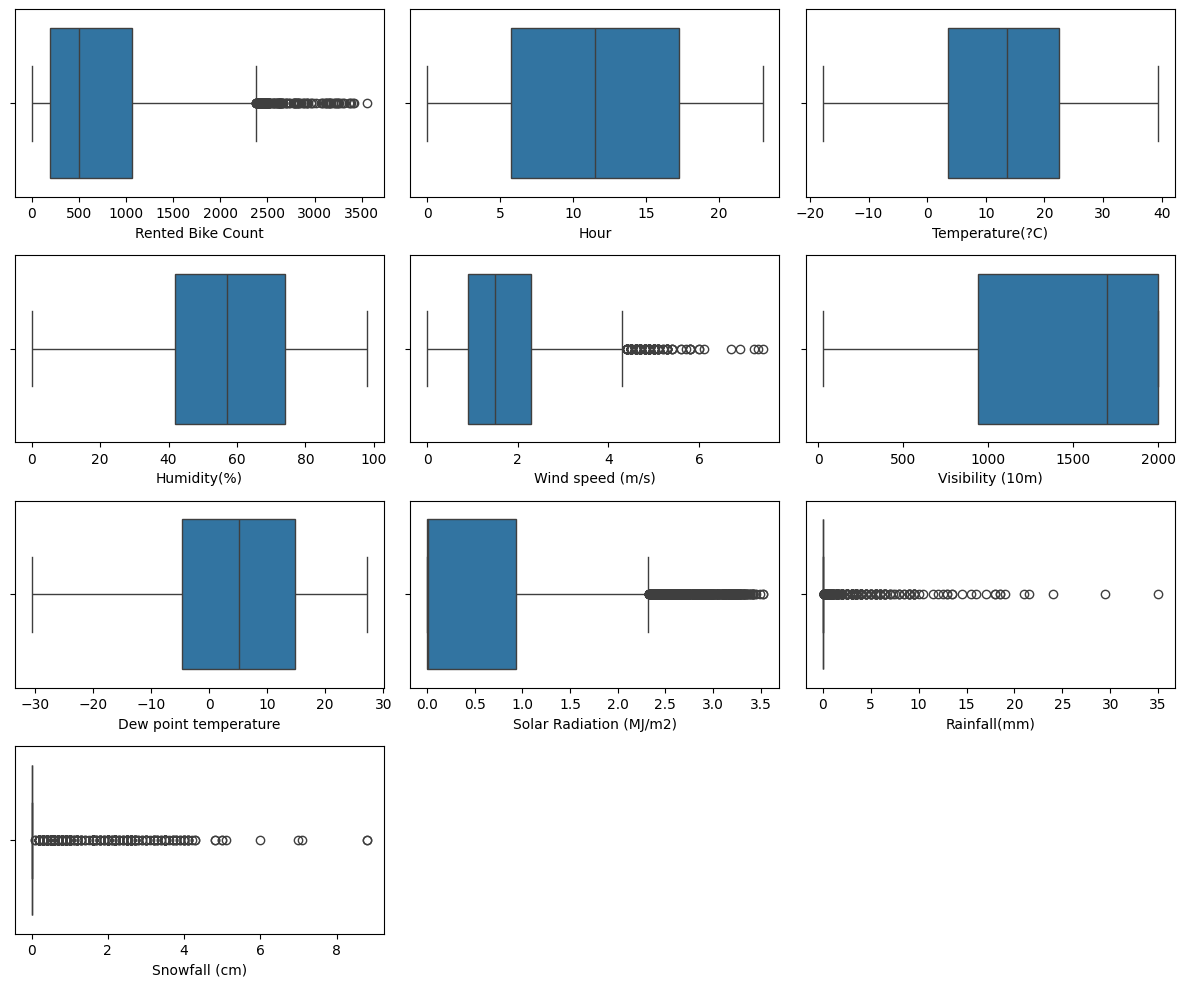

In [20]:
plt.figure(figsize=(12,12))
for i,col in enumerate(data.select_dtypes(include='number').columns):
  plt.subplot(5,3,i+1)
  sns.boxplot(x=data[col])
plt.tight_layout()
plt.show()

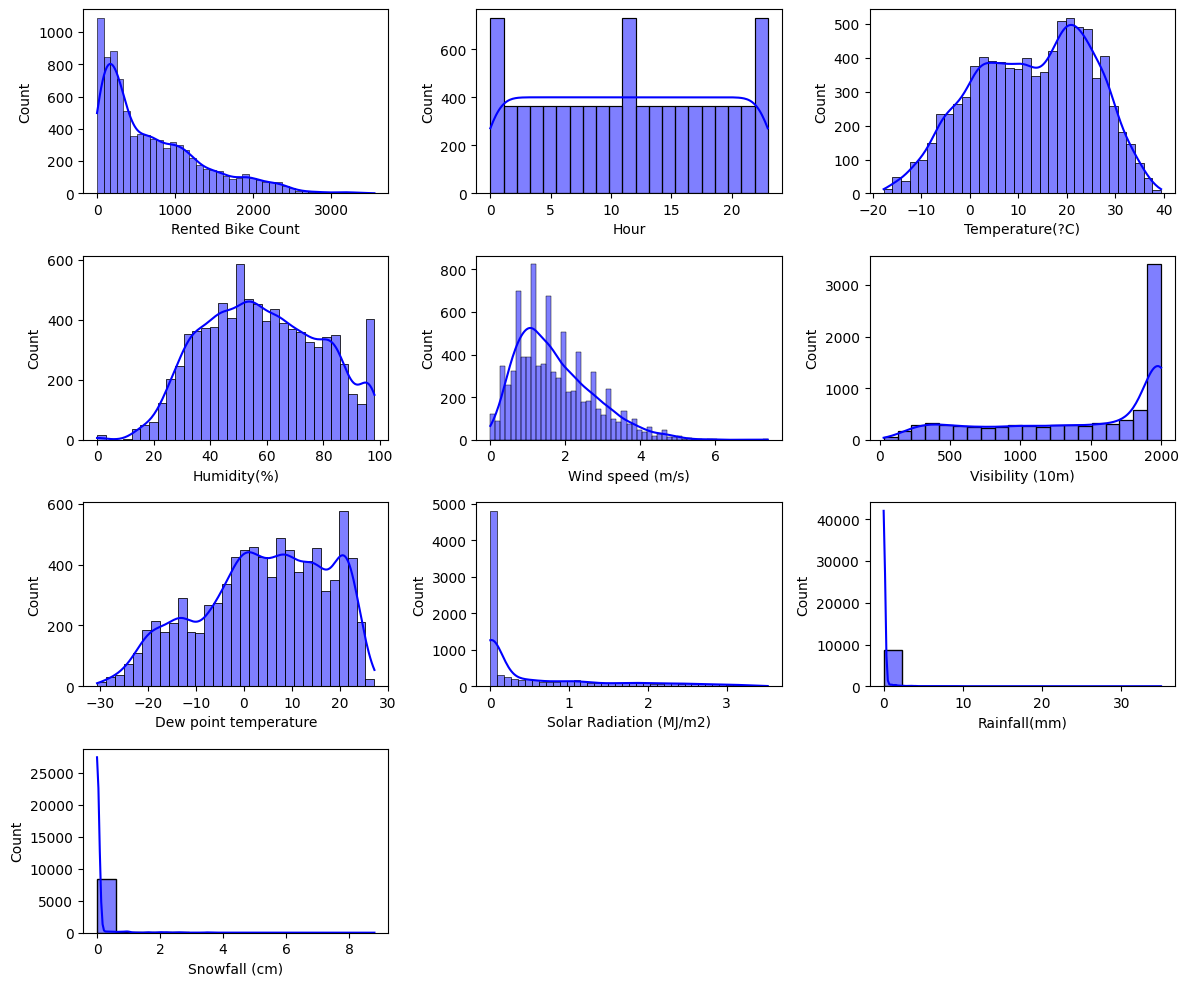

In [21]:
plt.figure(figsize=(12,12))
for i,col in enumerate(data.select_dtypes(include='number').columns) :
  plt.subplot(5,3,i+1)
  sns.histplot(data = data , x = col  , kde = True ,color='blue')
plt.tight_layout()
plt.show()

# Encoding the Categorical data to numerical

In [22]:
holiday = pd.get_dummies(data['Holiday'],drop_first=True)
functioning_day = pd.get_dummies(data['Functioning Day'],drop_first=True)
seasons = pd.get_dummies(data['Seasons'],drop_first=True)




In [23]:
data = pd.concat([data,holiday,functioning_day,seasons],axis=1)
data.head()



,Rented Bike Count,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Holiday,Functioning Day,Year,Month,Day,No Holiday,Yes,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,No Holiday,Yes,2017,12,1,True,True,False,False,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,No Holiday,Yes,2017,12,1,True,True,False,False,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,No Holiday,Yes,2017,12,1,True,True,False,False,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,No Holiday,Yes,2017,12,1,True,True,False,False,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,No Holiday,Yes,2017,12,1,True,True,False,False,True


In [24]:
data.drop(['Holiday','Functioning Day','Seasons'],axis=1,inplace=True)

In [25]:
data.head()

,Rented Bike Count,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,No Holiday,Yes,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,12,1,True,True,False,False,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,12,1,True,True,False,False,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,12,1,True,True,False,False,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,12,1,True,True,False,False,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,12,1,True,True,False,False,True


# Power Transformation
**The data exhibits significant dispersion and deviates from a normal distribution, indicating high variance and skewness. To address this, we need to stabilize the variance, reduce skewness, and transform the data to align more closely with a normal distribution.**

In [26]:
cols = data.select_dtypes(include='number').columns
from sklearn.preprocessing import PowerTransformer
transformation = PowerTransformer(method='yeo-johnson')
data[cols]= transformation.fit_transform(data[cols])


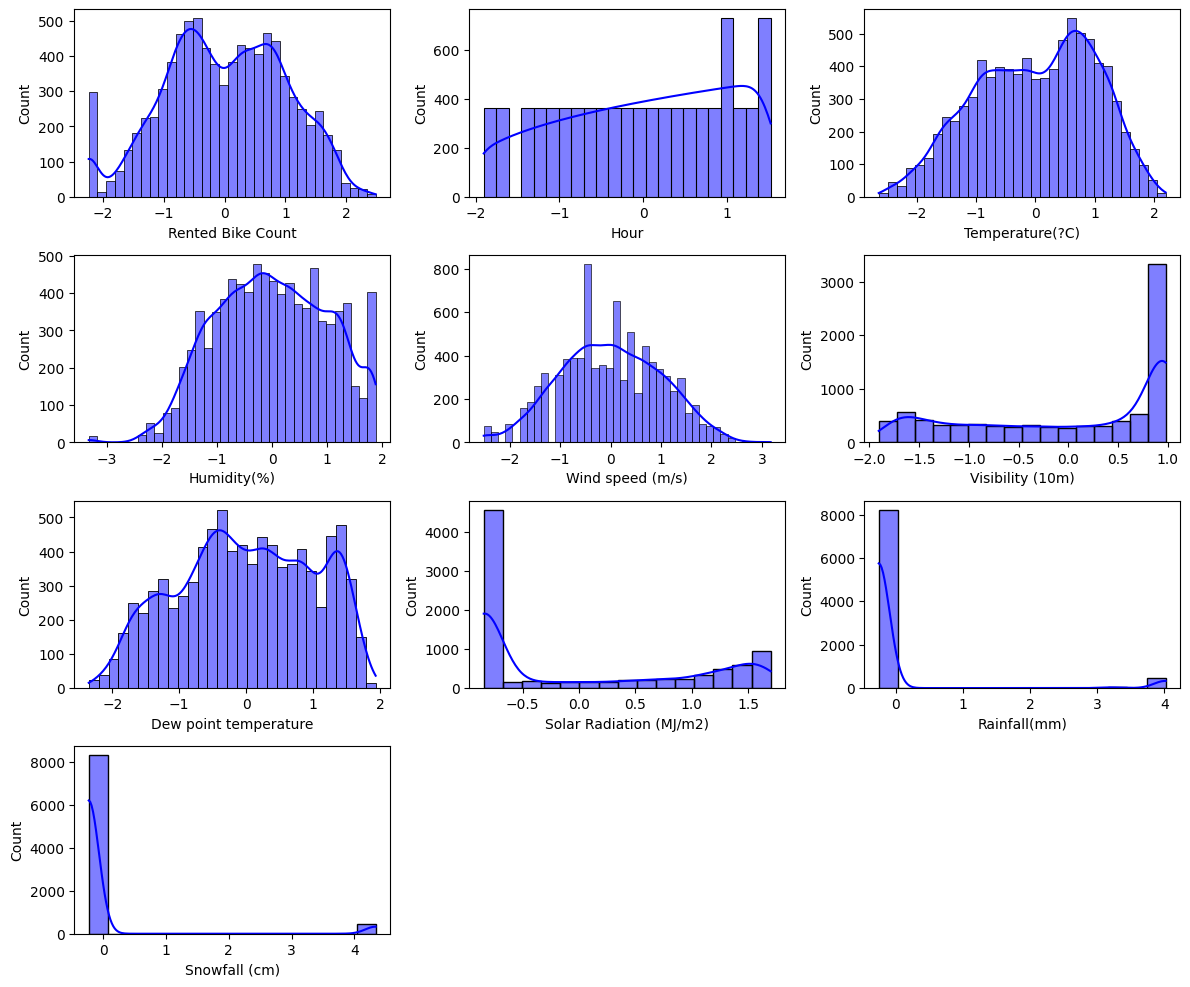

In [27]:

plt.figure(figsize=(12, 12))
for i, col in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=data, x=col,color='blue', kde=True)
plt.tight_layout()

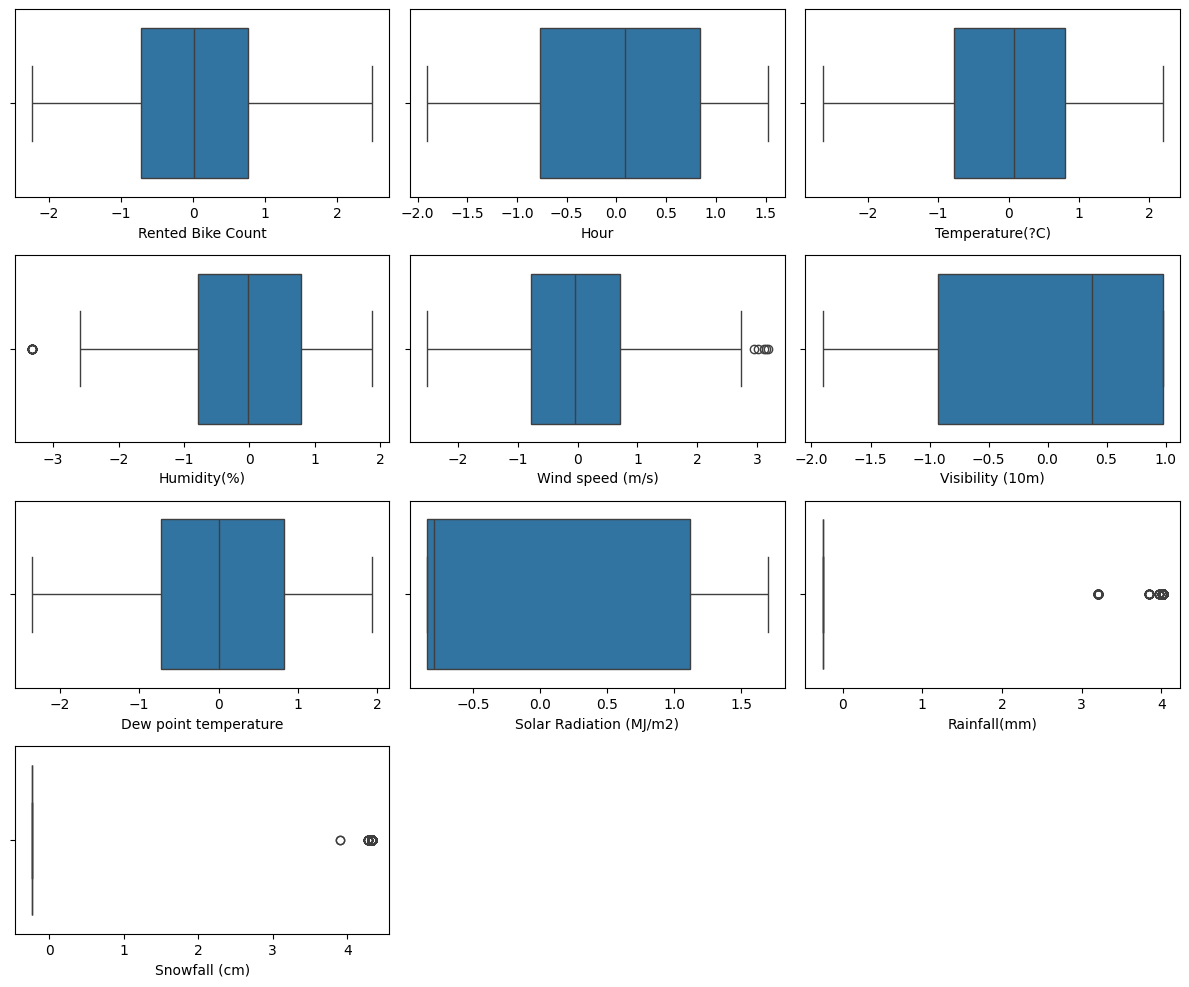

In [28]:

plt.figure(figsize=(12, 12))
for i, col in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=data, x=col)
plt.tight_layout()


# Checking the Correleation

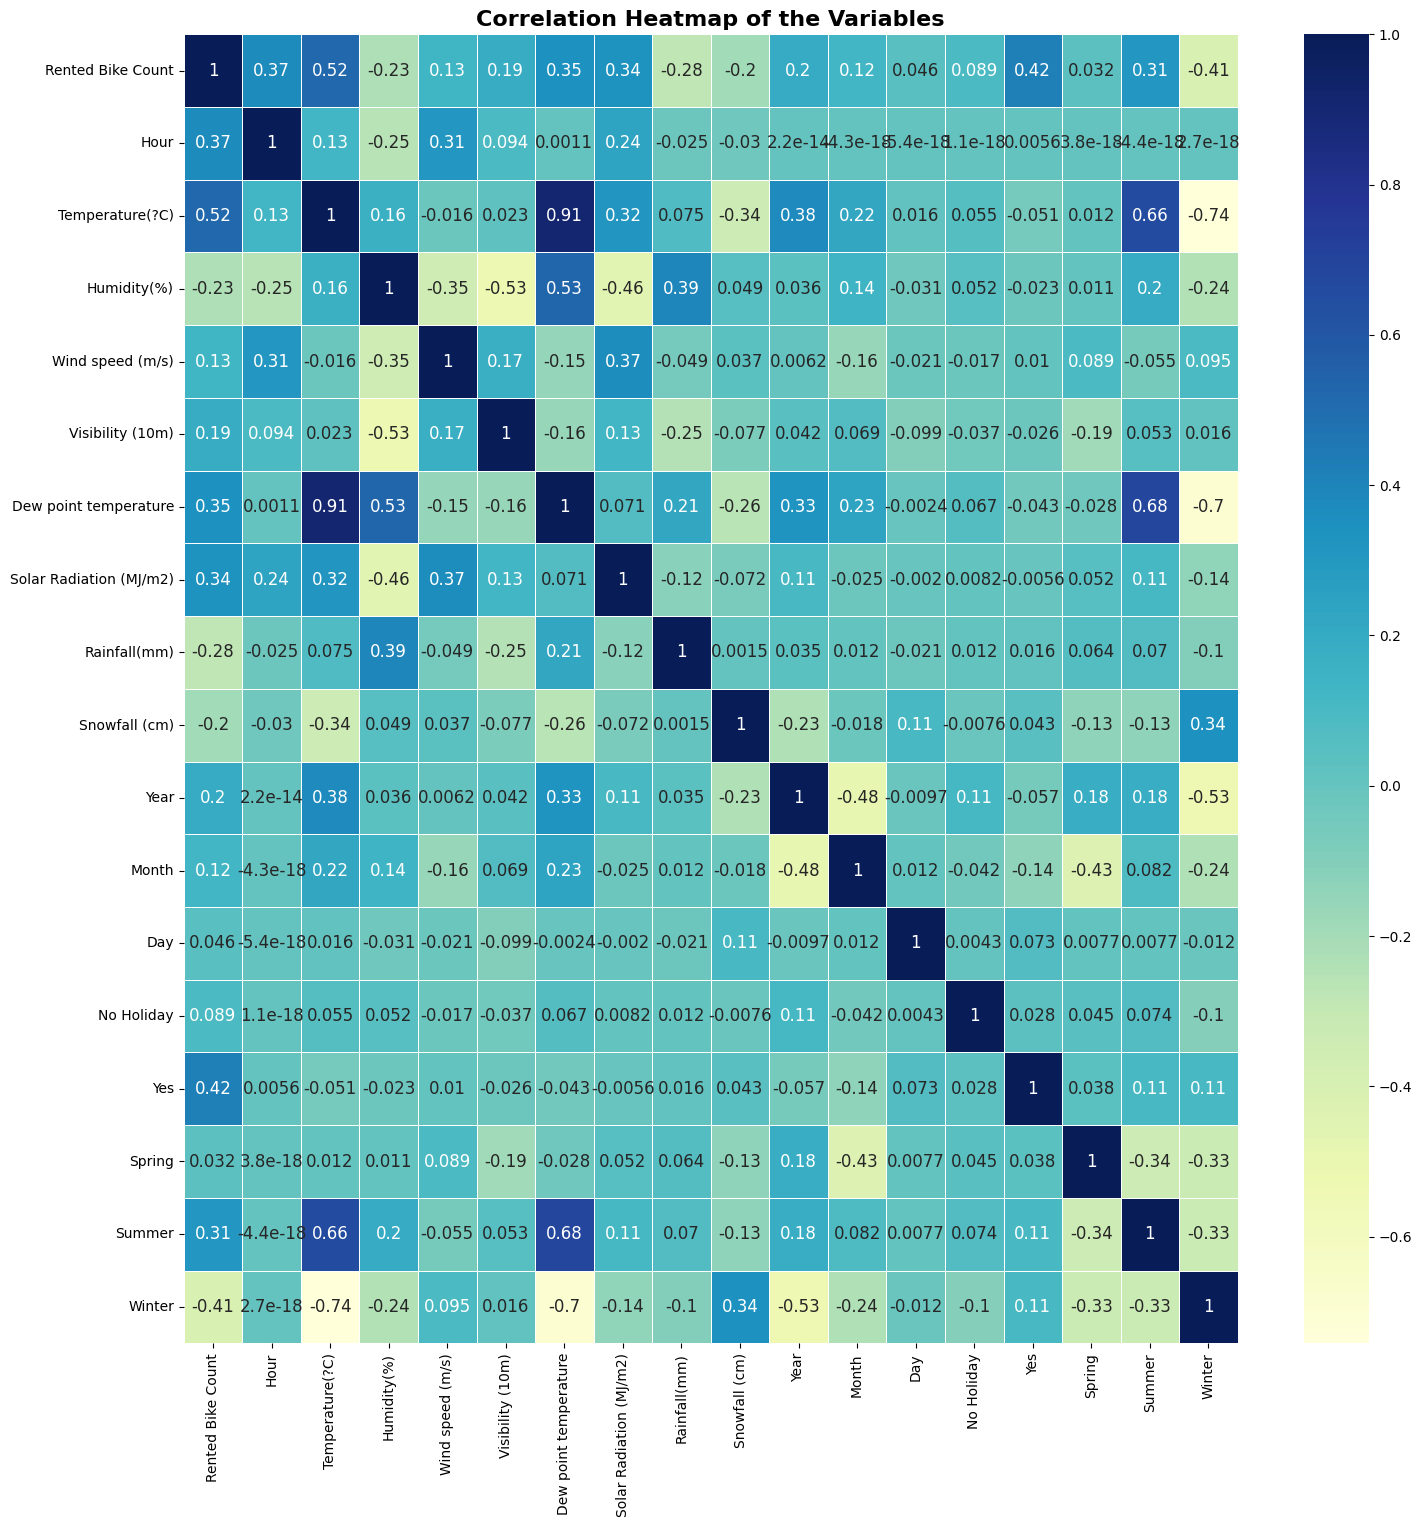

In [29]:
plt.figure(figsize=(17,17))
sns.heatmap(data.corr() ,annot=True , cmap = "YlGnBu",linewidths=0.5, annot_kws={'size': 12})
plt.title('Correlation Heatmap of the Variables', fontsize=16, fontweight='bold')
plt.show()

In [30]:
# as we see the temperature and Dew point temperature having strong releation so delete any one

data.drop('Dew point temperature',axis=1,inplace=True)

In [31]:
data.head()



,Rented Bike Count,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,No Holiday,Yes,Spring,Summer,Winter
0,-0.530004,-1.902967,-1.524521,-1.038829,0.618103,0.978214,-0.845761,-0.252859,-0.230785,2017,12,1,True,True,False,False,True
1,-0.676497,-1.654871,-1.550870,-0.986482,-0.923651,0.978214,-0.845761,-0.252859,-0.230785,2017,12,1,True,True,False,False,True
2,-0.779424,-1.440263,-1.594819,-0.934363,-0.640327,0.978214,-0.845761,-0.252859,-0.230785,2017,12,1,True,True,False,False,True
3,-1.047379,-1.244866,-1.612409,-0.882465,-0.778203,0.978214,-0.845761,-0.252859,-0.230785,2017,12,1,True,True,False,False,True
4,-1.200315,-1.062616,-1.594819,-1.091410,0.700184,0.978214,-0.845761,-0.252859,-0.230785,2017,12,1,True,True,False,False,True


# Splitting the target and input features

In [32]:
x = data.iloc[:,1:-1].values
y = data.iloc[:,0].values



# Splitting the data set in to test and train set

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


# Apply Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Training the different Regression models

# Linear Regression


In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [58]:
y_pred_LR = regressor.predict(x_test)


# Decision Tree Regression

In [67]:
from sklearn.tree import DecisionTreeRegressor
DTR_regressor = DecisionTreeRegressor(random_state = 100)
DTR_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [68]:
y_pred_DTR = DTR_regressor.predict(x_test)


# Random Forest Regression

In [75]:
from sklearn.ensemble import RandomForestRegressor
RFR_regressor = RandomForestRegressor(n_estimators = 100, random_state = 100)
RFR_regressor.fit(x_train, y_train)


RandomForestRegressor(random_state=100)

In [76]:
y_pred_RFR = RFR_regressor.predict(x_test)

# Support vector Regression

In [70]:
from sklearn.svm import SVR

SVR_regressor = SVR(kernel = 'rbf' , C=15.0654)
SVR_regressor.fit(x_train, y_train)




SVR(C=15.0654)

In [71]:
y_pred_SVR = SVR_regressor.predict(x_test)


# Gradient Boosting Regressor

In [110]:
from sklearn.ensemble import GradientBoostingRegressor
GBR_regressor = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, random_state=100)
GBR_regressor.fit(x_train, y_train)


GradientBoostingRegressor(n_estimators=300, random_state=100)

In [111]:
y_pred_GBR = GBR_regressor.predict(x_test)


# XGB Regressor

In [112]:
from xgboost import XGBRegressor
XGB_regressor = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=9 , reg_alpha=0.81 )
XGB_regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [113]:

y_pred_XGB = XGB_regressor.predict(x_test)


# Evaluation of the Regression Models

In [115]:


from sklearn.metrics import r2_score

accuracies = {
    'Linear Regression': r2_score(y_test, y_pred_LR),
    'Decision Tree Regressor': r2_score(y_test, y_pred_DTR),
    'Support Vector Regressor': r2_score(y_test, y_pred_SVR),
    'Random Forest Regressor': r2_score(y_test, y_pred_RFR),
    'Gradient Boosting Regressor': r2_score(y_test, y_pred_GBR),
    'XGBoost Regressor': r2_score(y_test, y_pred_XGB)
}
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
for model, accuracy in sorted_accuracies:
    print(f"{model}: {accuracy:.4f}")


XGBoost Regressor: 0.9247
Random Forest Regressor: 0.9101
Gradient Boosting Regressor: 0.9031
Support Vector Regressor: 0.8838
Decision Tree Regressor: 0.8391
Linear Regression: 0.7116
